# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination  
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
 # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
     
# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
settings = {"units": "imperial", "appid": api_key}

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"    #to turn temp into Far.

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#variables to hole the list of specific data
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

citycount = 0

for city in cities:
    #slow down api calls by 1 sec
    time.sleep(1)
    #retrieve api for each city
    target_url = query_url + city
    response = requests.get(target_url).json()
    #only pull citys that are found in that api
    if response['cod']==200:
        print (f"Processing Record: {citycount} | City Name: {city}")
        #gather neccessary data on each city and store in a list
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all']) 
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon']) 
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])
        citycount = citycount + 1
    # if city is not found in api
    else:
        print(f"City Not Found. Skipping...")
    
print(f"---------------------------------------")    
print(f"Data Retrieval Complete")
print(f"---------------------------------------")

Processing Record: 0 | City Name: airai
Processing Record: 1 | City Name: upernavik
Processing Record: 2 | City Name: busselton
Processing Record: 3 | City Name: katsuura
Processing Record: 4 | City Name: znamenskoye
Processing Record: 5 | City Name: gat
Processing Record: 6 | City Name: yellowknife
Processing Record: 7 | City Name: marawi
City Not Found. Skipping...
Processing Record: 8 | City Name: puerto ayora
Processing Record: 9 | City Name: avarua
Processing Record: 10 | City Name: hamilton
City Not Found. Skipping...
Processing Record: 11 | City Name: hobart
Processing Record: 12 | City Name: paamiut
Processing Record: 13 | City Name: ushuaia
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record: 14 | City Name: san carlos de bariloche
Processing Record: 15 | City Name: norrtalje
Processing Record: 16 | City Name: salalah
Processing Record: 17 | City Name: nanchang
Processing Record: 18 | City Name: lorengau
Processing Record: 19 | City Name: vaini
Processing

Processing Record: 167 | City Name: clyde river
Processing Record: 168 | City Name: ajka
Processing Record: 169 | City Name: makakilo city
Processing Record: 170 | City Name: asosa
Processing Record: 171 | City Name: busayra
Processing Record: 172 | City Name: mataura
Processing Record: 173 | City Name: slave lake
Processing Record: 174 | City Name: barrow
City Not Found. Skipping...
Processing Record: 175 | City Name: ulladulla
Processing Record: 176 | City Name: sioux lookout
Processing Record: 177 | City Name: roura
Processing Record: 178 | City Name: luderitz
Processing Record: 179 | City Name: tuktoyaktuk
Processing Record: 180 | City Name: carnarvon
Processing Record: 181 | City Name: lebu
Processing Record: 182 | City Name: nueva helvecia
Processing Record: 183 | City Name: kosh-agach
City Not Found. Skipping...
Processing Record: 184 | City Name: soldato-aleksandrovskoye
Processing Record: 185 | City Name: vostok
Processing Record: 186 | City Name: longyearbyen
Processing Recor

Processing Record: 337 | City Name: curvelo
Processing Record: 338 | City Name: salinopolis
Processing Record: 339 | City Name: rio grande
Processing Record: 340 | City Name: ust-nera
Processing Record: 341 | City Name: tema
Processing Record: 342 | City Name: petropavlovsk-kamchatskiy
Processing Record: 343 | City Name: wamba
Processing Record: 344 | City Name: tommot
Processing Record: 345 | City Name: howard springs
Processing Record: 346 | City Name: sept-iles
Processing Record: 347 | City Name: college
City Not Found. Skipping...
Processing Record: 348 | City Name: okato
Processing Record: 349 | City Name: luena
Processing Record: 350 | City Name: la ronge
City Not Found. Skipping...
Processing Record: 351 | City Name: minsk
Processing Record: 352 | City Name: niksar
Processing Record: 353 | City Name: puebla
Processing Record: 354 | City Name: hanmer springs
Processing Record: 355 | City Name: gizo
Processing Record: 356 | City Name: la reforma
City Not Found. Skipping...
Process

Processing Record: 503 | City Name: capreol
Processing Record: 504 | City Name: khuzdar
Processing Record: 505 | City Name: coihaique
Processing Record: 506 | City Name: wuda
Processing Record: 507 | City Name: tabou
Processing Record: 508 | City Name: kedougou
Processing Record: 509 | City Name: tanout
Processing Record: 510 | City Name: eregli
Processing Record: 511 | City Name: sao filipe
Processing Record: 512 | City Name: tabuk
Processing Record: 513 | City Name: marrakesh
Processing Record: 514 | City Name: namatanai
Processing Record: 515 | City Name: egvekinot
Processing Record: 516 | City Name: andilamena
Processing Record: 517 | City Name: muisne
Processing Record: 518 | City Name: arlit
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record: 519 | City Name: kentau
Processing Record: 520 | City Name: rocha
Processing Record: 521 | City Name: lima
Processing Record: 522 | City Name: leh
Processing Record: 523 | City Name: batagay-alyta
Processing Record: 52

In [4]:
#create dataframe 
city_df = pd.DataFrame({
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed
})

#double check for missing data
city_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:

city_df.head(25)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Airai,12,TL,1547343103,51,-8.93,125.41,87.93,1.97
1,Upernavik,32,GL,1547343160,100,72.79,-56.15,-5.77,9.35
2,Busselton,0,AU,1547343161,86,-33.64,115.35,72.36,18.07
3,Katsuura,40,JP,1547341200,81,33.93,134.50,42.80,8.05
4,Znamenskoye,92,RU,1547343164,68,57.13,73.82,2.52,14.27
5,Gat,0,SN,1547341200,83,14.69,-16.54,71.60,11.41
6,Yellowknife,20,CA,1547341200,76,62.45,-114.38,-9.41,12.75
7,Marawi,88,PH,1547343167,70,8.00,124.29,79.11,3.38
8,Puerto Ayora,40,EC,1547337600,61,-0.74,-90.35,82.40,16.11
9,Avarua,75,CK,1547341200,74,-21.21,-159.78,84.20,11.41


In [12]:
#save df as a csv
city_df.to_csv('citydataframe.csv', index=False)

In [18]:
city_df.describe()


,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,552.000000,5.520000e+02,552.000000,552.000000,552.000000,552.000000,552.000000
mean,43.039855,1.547343e+09,76.081522,20.994366,19.201341,45.903859,7.869764
std,35.005447,1.254776e+03,21.509941,33.803615,91.318239,33.546688,5.562487
min,0.000000,1.547338e+09,0.000000,-54.810000,-179.170000,-55.900000,0.470000
25%,5.000000,1.547341e+09,65.000000,-6.085000,-65.875000,24.800000,3.380000
50%,40.000000,1.547343e+09,80.500000,26.625000,23.320000,53.600000,6.165000
75%,76.000000,1.547344e+09,93.000000,50.322500,102.737500,73.822500,10.920000
max,100.000000,1.547344e+09,100.000000,78.220000,179.320000,104.000000,33.330000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

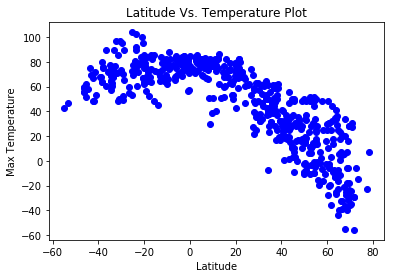

In [6]:

x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x,y,c='b')
plt.title('Latitude Vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

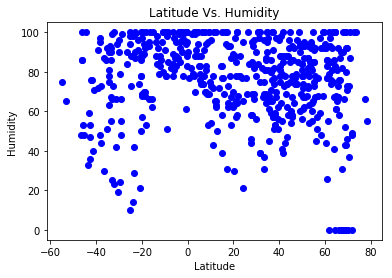

In [7]:
x = city_df['Lat']
y = city_df['Humidity']

plt.scatter(x,y,c='b')
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

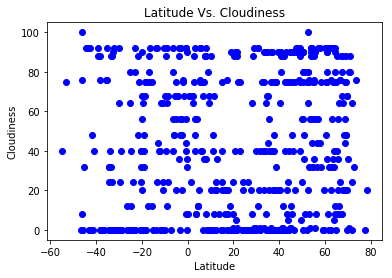

In [8]:
x = city_df['Lat']
y = city_df['Cloudiness']

plt.scatter(x,y,c='b')
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

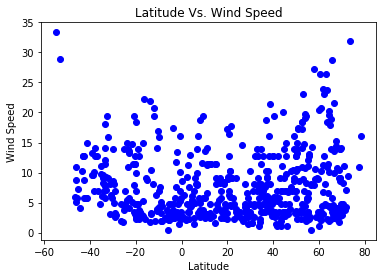

In [9]:
x = city_df['Lat']
y = city_df['Wind Speed']

plt.scatter(x,y,c='b')
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show